<a href="https://colab.research.google.com/github/sharop/CD3001B/blob/main/SEM_2/Path_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install semopy


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ejemplo de grafica

In [2]:
import pygraphviz as pgv

# Crear el grafo
G = pgv.AGraph(strict=False, directed=True)

# Agregar nodos
G.add_node("E", label="Educación")
G.add_node("I", label="Ingreso")

# Agregar arcos
G.add_edge("E", "I")

# Mostrar el grafo
G.draw("senderos.png", prog="dot")


# Ejemplo 2

Para este ejemplo, utilizaremos un conjunto de datos de la Encuesta Nacional de Salud y Nutrición de los Estados Unidos (NHANES) para investigar la relación entre la actividad física y la obesidad.

In [15]:
import pandas as pd
import numpy as np
import semopy
from semopy import Model,OptimalScaler, sem



ImportError: ignored

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/GTPB/PSLS20/master/data/NHANES.csv")


A continuación, definimos las variables que vamos a utilizar en nuestro modelo y creamos una matriz de correlación para evaluar la relación entre ellas:

In [5]:

# Definimos las variables
x1 = data['Age']
x2 = (data['Gender']=="male").replace({True: 1, False: 0}) 
x3 = (data['PhysActive'] == "Yes").replace({True: 1, False: 0}) 
y = ((data.Weight/((data.Height/100)**2)) >30).replace({True: 1, False: 0})
# Creamos la matriz de correlación
corr = np.corrcoef([x1, x2, x3, y])


Después, definimos el modelo de senderos utilizando la notación estándar y los coeficientes de regresión a partir de la matriz de correlación:

In [10]:
# Definimos el modelo utilizando la notación estándar
model = Model('''
    obesidad ~ edad + genero + fisicamente_activo
    fisicamente_activo ~ edad
''')
model.load_cov(corr)
##Age -> Obesity
#    Gender -> Obesity
#    PhysActive -> Obesity
#    Age -> PhysActive
#



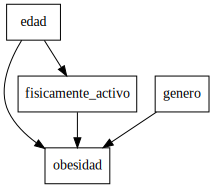

In [11]:
semopy.semplot(model, "model.png")

In [12]:
# Establecemos los coeficientes de regresión a partir de la matriz de correlación
model.parameters[0, 3] = corr[0, 3]
model.parameters[1, 3] = corr[1, 3]
model.parameters[2, 3] = corr[2, 3]
model.parameters[0, 2] = corr[0, 2]

En el modelo definido, `edad`, `genero`, y `fisicamente_activo` son las variables predictoras y `obesidad` es la variable de criterio o dependiente. Además, en el modelo se establecen las siguientes relaciones:

- `edad` tiene un efecto directo sobre `obesidad`
- `genero` tiene un efecto directo sobre `obesidad`
- `fisicamente_activo` tiene un efecto directo sobre `obesidad`
- `edad` tiene un efecto directo sobre `fisicamente_activo`

Finalmente, ajustamos el modelo y evaluamos los resultados:

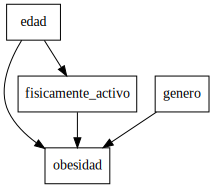

In [7]:

# Escalamos los datos óptimamente
scaler = OptimalScaler()
data_scaled = scaler.fit_transform(data)

# Ajustamos el modelo utilizando SEM
fit = sem(model, data_scaled)

# Evaluamos los resultados
print(fit.summary())

semopy.semplot(model, "model.png")

In [9]:
model.parameters

{'_b1': Model.Parameter(start=None, active=True, bound=(None, None), locations=[Model.ParameterLoc(matrix=array([[0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), indices=(0, 0), symmetric=False)]),
 '_b2': Model.Parameter(start=None, active=True, bound=(None, None), locations=[Model.ParameterLoc(matrix=array([[0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), indices=(0, 2), symmetric=False)]),
 '_b3': Model.Parameter(start=None, active=True, bound=(None, None), locations=[Model.ParameterLoc(matrix=array([[0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), indices=(0, 1), symmetric=False)]),
 '_b4': Model.Parameter(start=None, active=True, bound=(None, None), locations=[Model.ParameterLoc(matrix=array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), indices=(1, 0), symmetric=False)]),
 '_c1': Model.Parameter(start=None, active=False, bound=(0, None), locations=[Model.ParameterLoc(m